In [1]:
# import dataset
import pandas as pd
dataset = pd.read_csv('heart.csv')

# encode categorical data labels as numerical
from sklearn.preprocessing import LabelEncoder 
le = LabelEncoder()
dataset["RestingECG"] = le.fit_transform(dataset["RestingECG"])
dataset["ST_Slope"] = le.fit_transform(dataset["ST_Slope"])
dataset["ExerciseAngina"] = le.fit_transform(dataset["ExerciseAngina"])
dataset["ChestPainType"] = le.fit_transform(dataset["ChestPainType"])
dataset["Sex"] = le.fit_transform(dataset["Sex"])

# split into X and y
y = dataset["HeartDisease"]
X = dataset.drop(columns=["HeartDisease"])

# scale variables to lie in same range
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

# split into train/test set
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)



In [2]:
####### Do hyperparameter optimisation by bayes search cross validation ########
from skopt import BayesSearchCV
from skopt.space import Real, Integer, Categorical
from xgboost import XGBClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score, make_scorer, confusion_matrix, precision_score, recall_score, accuracy_score

search_space = {"n_estimators": Integer(600, 900),
        "max_depth": Integer(8, 15),
        "learning_rate": Real(0.05, 0.3), 
        "reg_alpha": Real(0, 1),
        "reg_lambda": Real(0, 1),
        "gamma": Real(0, 1),
#         "min_child_weight": Real(0, 50),
#         "use_label_encoder":Categorical([False]),
#         'binary:logistic':Categorical(["logloss"]),
#         'max_delta_step': Real(0, 20),
#         'subsample': Real(0, 1.0, 'uniform')
    }

XGB_bayes_search = BayesSearchCV(
    estimator = XGBClassifier(
        n_jobs = 1,
        objective = 'binary:logistic',
        iid="False"
    ),
    search_spaces = search_space,
    scoring = 'roc_auc',
    cv = StratifiedKFold(n_splits=5),
    n_jobs = 3,
    n_iter = 64
    )

def callback(res):
    global i
    print("Run ",i, " / 64")
    i += 1


i = 0
XGB_bayes_search.fit(X_train, y_train, callback=callback)


best_params = XGB_bayes_search.best_params_
best_estimator = XGB_bayes_search.best_estimator_
best_score = XGB_bayes_search.best_score_

Run  0  / 64
Run  1  / 64
Run  2  / 64
Run  3  / 64
Run  4  / 64
Run  5  / 64
Run  6  / 64
Run  7  / 64
Run  8  / 64
Run  9  / 64
Run  10  / 64
Run  11  / 64
Run  12  / 64
Run  13  / 64
Run  14  / 64
Run  15  / 64
Run  16  / 64
Run  17  / 64
Run  18  / 64
Run  19  / 64
Run  20  / 64
Run  21  / 64
Run  22  / 64
Run  23  / 64
Run  24  / 64


C:\Users\jonatan\Anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Run  25  / 64
Run  26  / 64
Run  27  / 64
Run  28  / 64


C:\Users\jonatan\Anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Run  29  / 64
Run  30  / 64
Run  31  / 64
Run  32  / 64
Run  33  / 64
Run  34  / 64
Run  35  / 64
Run  36  / 64
Run  37  / 64
Run  38  / 64


C:\Users\jonatan\Anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Run  39  / 64
Run  40  / 64


C:\Users\jonatan\Anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Run  41  / 64
Run  42  / 64
Run  43  / 64


C:\Users\jonatan\Anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Run  44  / 64
Run  45  / 64


C:\Users\jonatan\Anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Run  46  / 64


C:\Users\jonatan\Anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Run  47  / 64
Run  48  / 64
Run  49  / 64
Run  50  / 64
Run  51  / 64


C:\Users\jonatan\Anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Run  52  / 64


C:\Users\jonatan\Anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Run  53  / 64


C:\Users\jonatan\Anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Run  54  / 64
Run  55  / 64
Run  56  / 64
Run  57  / 64


C:\Users\jonatan\Anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Run  58  / 64
Run  59  / 64
Run  60  / 64
Run  61  / 64


C:\Users\jonatan\Anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Run  62  / 64
Run  63  / 64
[19:58:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "iid" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[19:58:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\jonatan\AppData\Roaming\Python\Python37\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


In [3]:
print(best_params)
print("Best CV score:")
print(best_score)
print("refit model test set score:")
print(XGB_bayes_search.score(X_test, y_test))
print("refit model test set score: (other method) - it should be the same, but sometimes isn't - why?")
print(XGB_bayes_search.best_estimator_.score(X_test, y_test))

OrderedDict([('gamma', 0.6861090944170453), ('learning_rate', 0.11730639213971089), ('max_depth', 11), ('n_estimators', 685), ('reg_alpha', 0.7711278581578535), ('reg_lambda', 0.8789716417278316)])
Best CV score:
0.9280022478245823
refit model test set score:
0.9441654710664753
refit model test set score: (other method) - it should be the same, but sometimes isn't - why?
0.8695652173913043


AUC:  0.8560497369679578
Precision:  0.819672131147541
Recall:  0.9803921568627451
Accuracy:  0.8695652173913043

Confusion matrix: 
     pred_neg  pred_pos
neg        60        22
pos         2       100


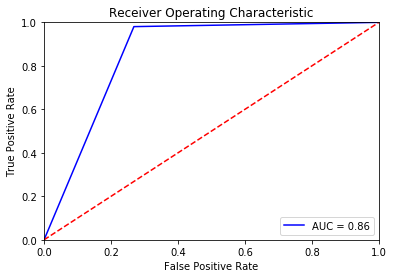

In [6]:
# Model Building

# clf = XGBClassifier(use_label_encoder=False,
#                    eval_metric="logloss",
#                    n_estimators=600,
#                    max_depth=3,
#                    learning_rate=0.1)

# # fit the model on the train dataset
# clf.fit(X_train, y_train, verbose=0)

clf = best_estimator

# run the fitted model on the test set and obtain the probabilities that each data point lies in each class
y_prob = clf.predict_proba(X_test)

# set the probabilty threshold to determine precision/recall tradeoff
threshold = 0.2

# obtain 1/0 list based on if probabiltiy is above/below threshold
certainty = y_prob[:, 1] > threshold
y_pred = certainty.astype(int)  

# y_pred = clf.predict(X_test)

# calculate metrics
fpr, tpr, threshold = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)


print("AUC: ", roc_auc)
print("Precision: " , prec)
print("Recall: " , rec)
print("Accuracy: ", acc)

print("")
print("Confusion matrix: ")
print(pd.DataFrame(confusion_matrix(y_test, y_pred),
             columns=['pred_neg', 'pred_pos'], index=['neg', 'pos']))

import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

The model achieves a precision of 0.82 and a recall of 0.98. This model focuses on the recall instead of precision as a false positive is much less dangerous than a false negative when it comes to heart disease. I.e. it is better to erroneously start treatment for a potential at risk individual than to not treat an at-risk individual.